In [2]:
import pandas as pd

In [3]:
data = pd.read_excel("Employees.xlsx")

In [4]:
data.head()

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,1,Ghadir,Hmshw,Male,2018-04-04,2,Quality Control,Egypt,West,1560,18720,3.0,1,0,183
1,2,Omar,Hishan,Male,2020-05-21,0,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198
2,3,Ailya,Sharaf,Female,2017-09-28,3,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0,3,192
3,4,Lwiy,Qbany,Male,2018-08-14,2,Manufacturing,United Arab Emirates,Main,1828,21936,3.0,0,0,7
4,5,Ahmad,Bikri,Male,2020-03-11,0,Manufacturing,Egypt,Main,970,11640,5.0,0,5,121


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   No              689 non-null    int64         
 1   First Name      689 non-null    object        
 2   Last Name       689 non-null    object        
 3   Gender          689 non-null    object        
 4   Start Date      689 non-null    datetime64[ns]
 5   Years           689 non-null    int64         
 6   Department      689 non-null    object        
 7   Country         689 non-null    object        
 8   Center          689 non-null    object        
 9   Monthly Salary  689 non-null    int64         
 10  Annual Salary   689 non-null    int64         
 11  Job Rate        689 non-null    float64       
 12  Sick Leaves     689 non-null    int64         
 13  Unpaid Leaves   689 non-null    int64         
 14  Overtime Hours  689 non-null    int64         
dtypes: dat

In [6]:
data.shape

(689, 15)

In [7]:
data.isna().sum

<bound method DataFrame.sum of         No  First Name  Last Name  Gender  Start Date  Years  Department  \
0    False       False      False   False       False  False       False   
1    False       False      False   False       False  False       False   
2    False       False      False   False       False  False       False   
3    False       False      False   False       False  False       False   
4    False       False      False   False       False  False       False   
..     ...         ...        ...     ...         ...    ...         ...   
684  False       False      False   False       False  False       False   
685  False       False      False   False       False  False       False   
686  False       False      False   False       False  False       False   
687  False       False      False   False       False  False       False   
688  False       False      False   False       False  False       False   

     Country  Center  Monthly Salary  Annual Salary  Job

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
import matplotlib.pyplot as plt

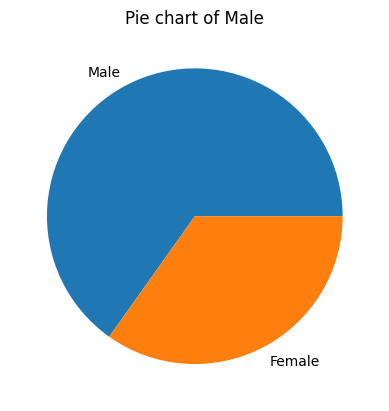

In [10]:
data["Gender"].value_counts().sort_values(ascending= False).plot(kind="pie")
plt.title("Pie chart of Male")
plt.ylabel("")
plt.show()

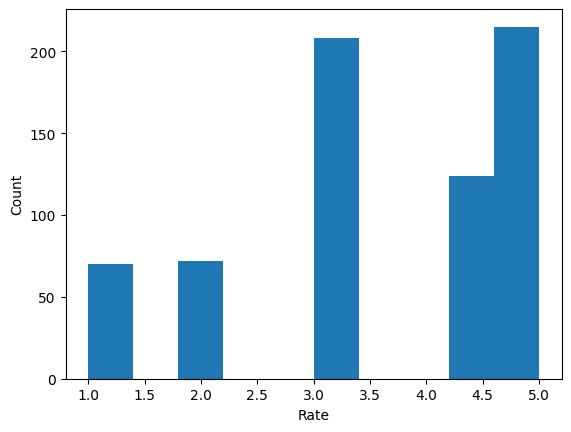

In [11]:
plt.hist(data["Job Rate"])
plt.xlabel("Rate")
plt.ylabel("Count")
plt.show()

In [12]:
data["Job Rate"].describe()

count    689.000000
mean       3.586357
std        1.350125
min        1.000000
25%        3.000000
50%        3.000000
75%        5.000000
max        5.000000
Name: Job Rate, dtype: float64

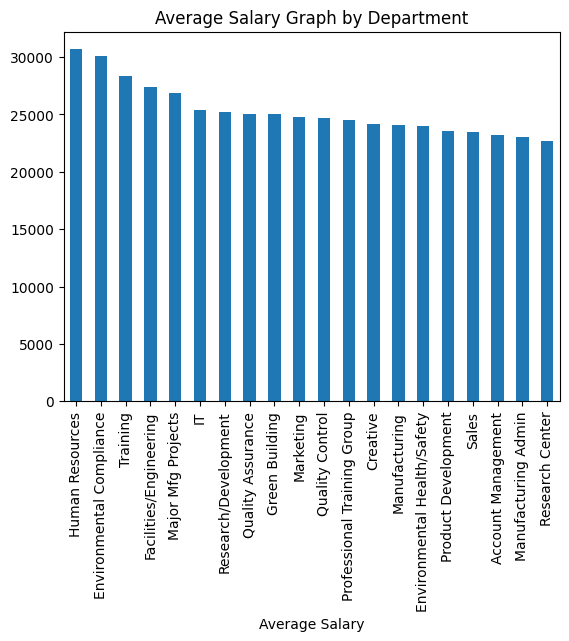

In [13]:
data.groupby("Department")["Annual Salary"].mean().sort_values(ascending=False).plot(kind="bar")
plt.title("Average Salary Graph by Department")
plt.xlabel("Department")
plt.xlabel("Average Salary")
plt.show()

In [14]:
data.groupby("Center")["Monthly Salary"].mean().sort_values(ascending=False)

Center
East     2274.021277
West     2068.672269
North    2064.811594
Main     2054.776892
South    1981.153846
Name: Monthly Salary, dtype: float64

In [15]:
data["Country"].unique()

array(['Egypt', 'Saudi Arabia', 'United Arab Emirates', 'Syria',
       'Lebanon'], dtype=object)

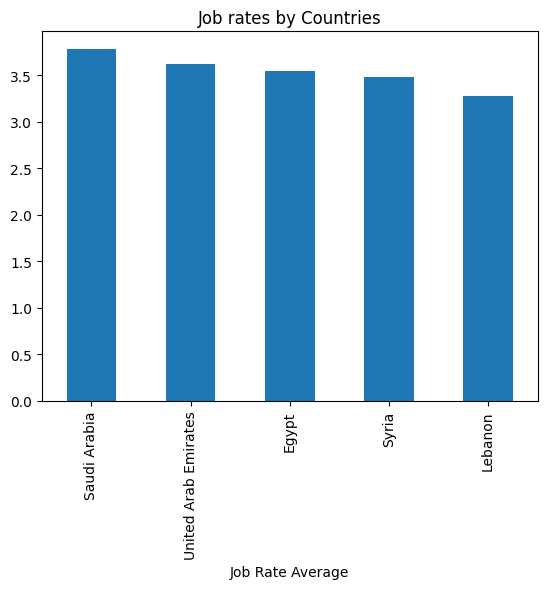

In [16]:
data.groupby("Country")["Job Rate"].mean().sort_values(ascending=False).plot(kind="bar")
plt.title("Job rates by Countries")
plt.xlabel("Country")
plt.xlabel("Job Rate Average")
plt.show()


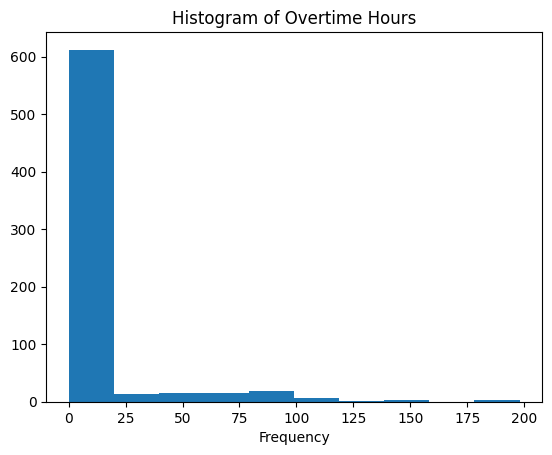

In [17]:
plt.hist(data["Overtime Hours"])
plt.title("Histogram of Overtime Hours")
plt.xlabel("Overtime Hours")
plt.xlabel("Frequency")
plt.show()


In [18]:
X = data[["Years","Job Rate"]]
y = data["Annual Salary"]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)


In [20]:
len(X_train)

551

In [21]:
len(y_train)

551

In [22]:
len(y_test)

138

In [23]:
len(X_test)

138

In [24]:
from sklearn.linear_model import LinearRegression
 

In [25]:
lr =LinearRegression()

In [26]:
lr.fit(X_train,y_train)

LinearRegression()

In [27]:
predslr = lr.predict(X_test)

In [28]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predslr,y_test)

7887.896787650333

In [29]:
import joblib 
joblib.dump(lr,"linearmodel.pkl")

['linearmodel.pkl']